In [1]:
from Wind.Private.DBConfig import mongoconnection
from pymongo import MongoClient
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
client = MongoClient(mongoconnection.server)
db = client[mongoconnection.db]
db.authenticate(mongoconnection.user, password=mongoconnection.passwd)
col = db[mongoconnection.col]


In [3]:
colors = {'regdir':'b', 'seq2seq':'r', 'mlp': 'g'}

def find_exp(query):
    return col.find(query)

def count_exp(query):
    print col.count(query)
    
    
def compare_exp(lexp, n=10):
    
    fig = plt.figure(figsize=(16, 10), dpi=100)

    axes = fig.add_subplot(1, 2, 1)

    ldiff = {'regdir':[], 'seq2seq':[], 'mlp':[]}
    
    for exp in lexp:
        data = np.array(exp['result'])
        ldiff[exp['arch']['mode']].append((np.sum(data[:,1]), exp))
        axes.plot(data[:,0], data[:,1],colors[exp['arch']['mode']])

    
    besta = {}
    for type in ldiff:
        besta[type] = [b[1] for b in sorted(ldiff[type], reverse=True)[:n]]


        for exp in besta[type]:
            axes = fig.add_subplot(1, 2, 2)
            data = np.array(exp['result'])
            axes.plot(data[:,0], data[:,1], colors[exp['arch']['mode']])
            axes.plot(data[:,0], data[:,3], colors[exp['arch']['mode']]+'--')
            
    return besta

    

In [4]:
query1= {'status':'done', 
         #'arch.mode':'seq2seq',
             #   'data.lag':32, 
             # 'data.dataset':3, 
               # 'data.vars': [0,1,2,3],
              #  'arch.neurons': 32, 
               # 'arch.drop':0.1,
              #  'arch.rnn':'GRU',
               # 'arch.bidirectional':False,
               # 'arch.activation':'tanh'
               }

In [5]:
count_exp(query1)

5085


In [6]:
res1= find_exp(query1)

#print res1['arch']

/usr/lib64/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


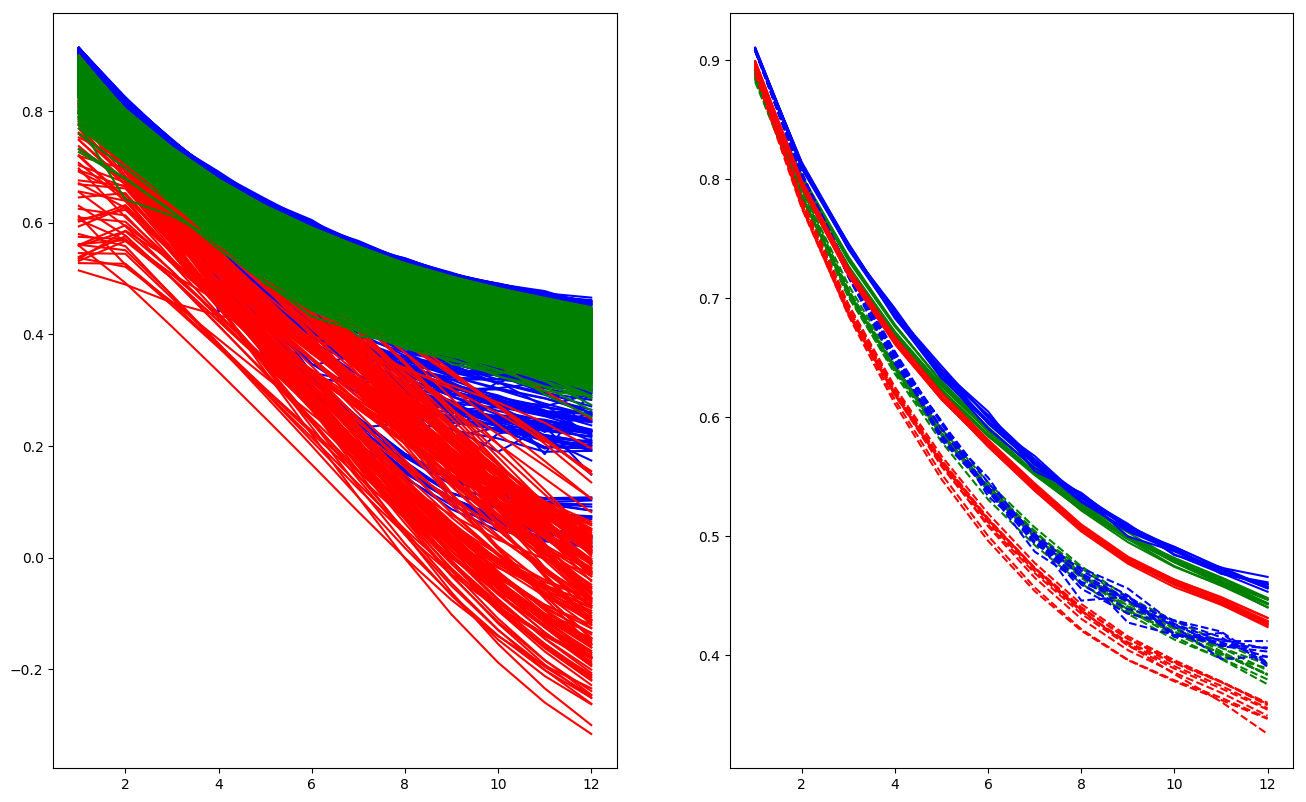

In [7]:
best = compare_exp(res1)

In [13]:
i=4
type = 'mlp'

print(best[type][i]['_id'])
print(best[type][i]['data']['dataset'])
print(best[type][i]['data']['lag'])
print(best[type][i]['data']['vars'])
print(best[type][i]['arch']['rnn'])
print(best[type][i]['arch']['nlayers'])
print(best[type][i]['arch']['nlayersE'])
print(best[type][i]['arch']['nlayersD'])
print(best[type][i]['arch']['neurons'])
print(0 if not 'neuronsD' in  best[type][i]['arch'] else best[type][i]['arch']['neuronsD'])
print(best[type][i]['arch']['drop'])
print(best[type][i]['arch']['bidirectional'])
print(best[type][i]['arch']['activation'])
print(best[type][i]['arch']['mode'])
print(best[type][i]['training']['optimizer'])
print(best[type][i]['arch']['full'])

print(np.array(best[type][i]['result'])[:,1])

1523347848
1
24
[0, 1, 2, 3, 4, 5]
GRU
2
1
1
64
8
0.2
False
relu
mlp
adamax
[256, 128, 64]
[0.88867981 0.79512286 0.72412925 0.66754201 0.62285073 0.5849601
 0.55161465 0.5221546  0.49972392 0.48158323 0.46529877 0.44793446]


In [9]:
i=0
for type in best:
    print(type, np.array(best[type][i]['result'])[:,1])  

('mlp', array([0.8908054 , 0.79913623, 0.73131193, 0.67588269, 0.6302419 ,
       0.59136796, 0.55675231, 0.52723143, 0.50304656, 0.48021513,
       0.4622595 , 0.44733937]))
('regdir', array([0.90769386, 0.81398563, 0.74528206, 0.684751  , 0.63929894,
       0.60113819, 0.56214923, 0.53505827, 0.50872348, 0.48454918,
       0.46870792, 0.45930467]))
('seq2seq', array([0.89787923, 0.79823203, 0.72437538, 0.66713222, 0.62014338,
       0.58090355, 0.54418795, 0.50974762, 0.48261613, 0.46319924,
       0.44873676, 0.43128099]))
